/Users/takashi/.pyenv/versions/anaconda3-4.3.1/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


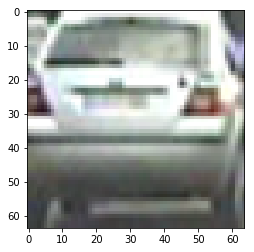

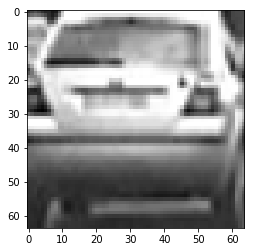

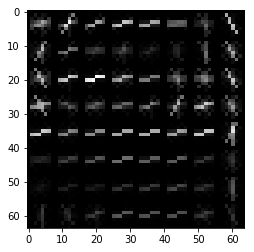

In [19]:
 %matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.feature import hog
import cv2

img = mpimg.imread("../vehicles/GTI_Far/image0929.png")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
pix_per_cell = 8
cell_per_block = 2
orient = 9

features, hog_image = hog(gray, orientations=orient, 
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), visualise=True, feature_vector=False)


plt.imshow(img)
plt.show()
plt.imshow(gray, cmap="gray")
plt.show()
plt.imshow(hog_image, cmap="gray")
plt.show()
# fig = plt.figure()
# plt.subplot(121)
# plt.imshow(img, cmap='gray')
# plt.title('Example Car Image')
# plt.subplot(122)
# plt.imshow(hog_image, cmap='gray')
# plt.title('HOG Visualization')


In [24]:
import sklearn.utils
from sklearn.model_selection import train_test_split
import glob

vehicles_files = []
non_vehicles_files = []
for f in glob.glob("../vehicles/KITTI_extracted/*.png"):
    vehicles_files.append(f)
    
for f in glob.glob("../non-vehicles/Extras/*.png"):
    non_vehicles_files.append(f)

print(len(vehicles_files))
print(len(non_vehicles_files))


train_vehicles, validation_vehicles = train_test_split(vehicles_files, test_size=0.2, random_state=0)
train_non_vehicles, validation_non_vehicles = train_test_split(non_vehicles_files, test_size=0.2, random_state=0)

print(len(train_vehicles), len(validation_vehicles))
print(len(train_non_vehicles), len(validation_non_vehicles))

#hogに変換

from sklearn import svm
clf = svm.SVC()
clf.fit(train_features, train_labels)


5966
5068
4772 1194
4054 1014


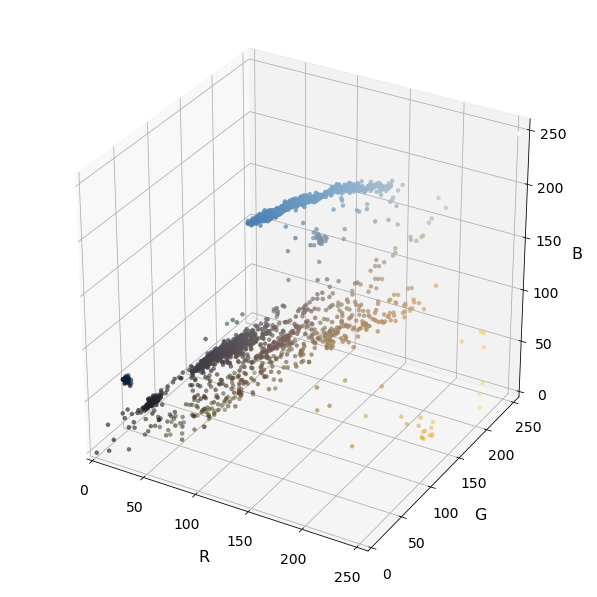

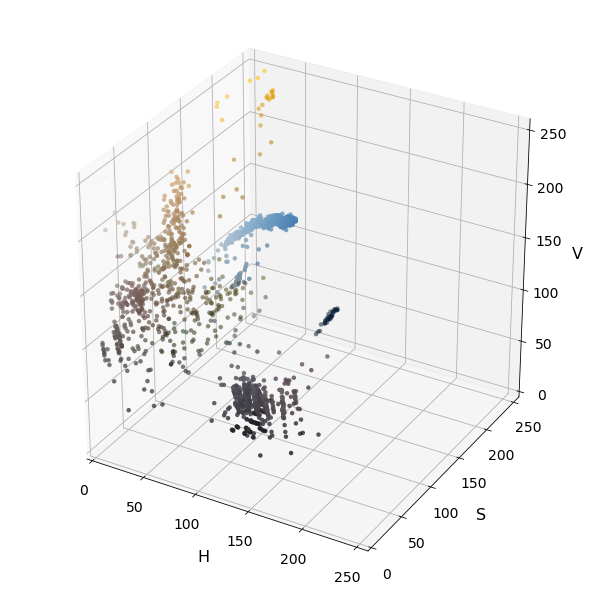

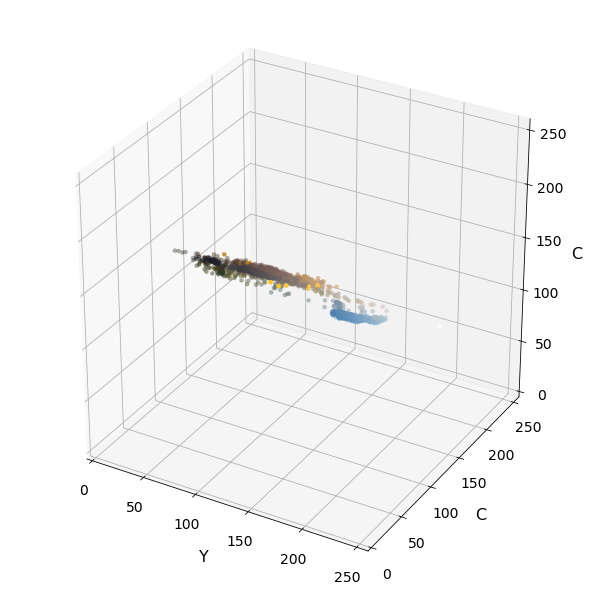

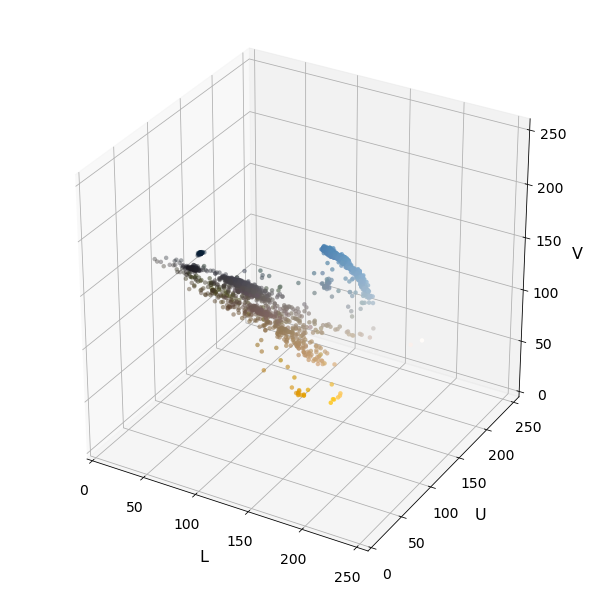

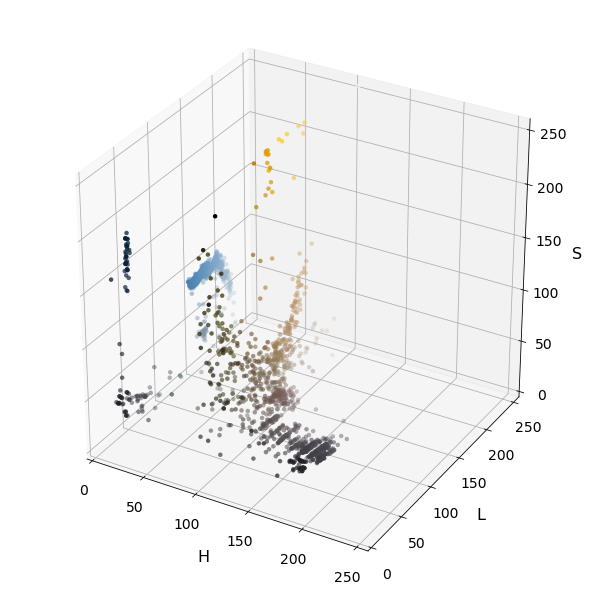

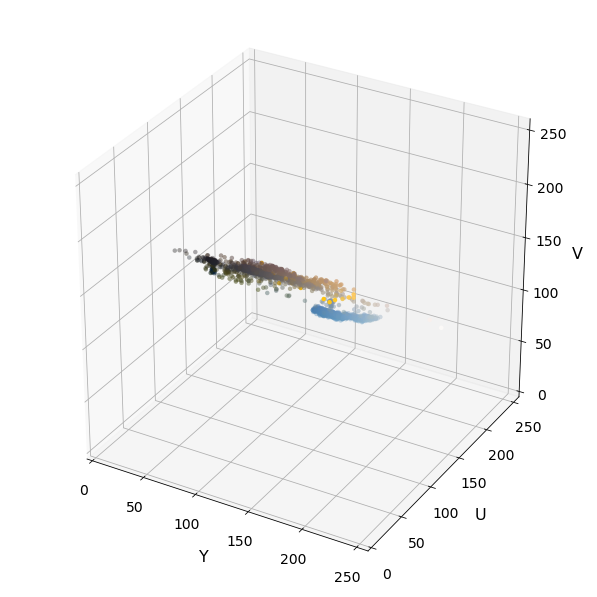

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation


# Read a color image
# img = cv2.imread("test_images/test1.jpg")
img = cv2.imread("test_images/test2.jpg")

# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_YCrCb = cv2.cvtColor(img_small, cv2.COLOR_RGB2YCrCb)
img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_RGB2LUV)
img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_RGB2HLS)
img_small_YUV = cv2.cvtColor(img_small, cv2.COLOR_RGB2YUV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

plot3d(img_small_YCrCb, img_small_rgb, axis_labels=list("YCC"))
plt.show()

plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.show()

plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
plt.show()

plot3d(img_small_YUV, img_small_rgb, axis_labels=list("YUV"))
plt.show()